In [3]:
import pandas as pd
import numpy as np
import os 
import glob

In [5]:
def make_label(filename):
    df = pd.read_excel('../data/Hazumi1911/questionnaire/1911questionnaires.xlsx', sheet_name=4, index_col=0, header=1)
    data = df.loc[filename, :].values.tolist()
    return [data[0]+(8-data[5]), (8-data[1])+data[6], data[2]+(8-data[7]), data[3]+(8-data[8]), data[4]+(8-data[9])]

In [18]:
def make_label_thirdbigfive(filename):
    df = pd.read_excel('../data/Hazumi1911/questionnaire/220818thirdbigfive-Hazumi1911.xlsx', sheet_name=5, header=1, index_col=0)
    data = df.loc[filename].values.tolist()
    return [data[5], data[13], data[21], data[29], data[37]]

[10.4, 11.2, 8.0, 6.8, 7.2]

In [19]:
videoIDs = {}
videoAudio = {}
videoText = {}
videoVisual = {} 
videoLabels = {}
videoSentence = {}

Vid = []

path = '../data/Hazumi1911/dumpfiles/*'

files = glob.glob(path)

for file_path in sorted(files):
    filename = os.path.basename(file_path).split('.', 1)[0]
    df = pd.read_csv(file_path)
    text = df.loc[:, 'word#0001':'su'].values.tolist()
    audio = df.loc[:, 'pcm_RMSenergy_sma_max':'F0_sma_de_kurtosis'].values.tolist()
    visual = df.loc[:, '17_acceleration_max':'AU45_c_mean'].values.tolist()
    
    Vid.append(filename)
    videoAudio[filename] = audio 
    videoText[filename] = text 
    videoVisual[filename] = visual 
    videoIDs[filename] = []
    videoLabels[filename] = make_label_thirdbigfive(filename)
    videoSentence[filename] = []



(71, 2613)
(113, 2613)
(74, 2613)
(77, 2613)
(98, 2613)
(97, 2613)
(110, 2613)
(90, 2613)
(110, 2613)
(113, 2613)
(81, 2613)
(84, 2613)
(84, 2613)
(97, 2613)
(96, 2613)
(101, 2613)
(98, 2613)
(95, 2613)
(107, 2613)
(104, 2613)
(77, 2613)
(94, 2613)
(54, 2613)
(110, 2613)
(99, 2613)
(105, 2613)


In [20]:
import pickle 

with open('../data/Hazumi1911/Hazumi1911_features/Hazumi1911_features.pkl', mode='wb') as f:
    pickle.dump((videoIDs, videoLabels, videoText, videoAudio, videoVisual, videoSentence, Vid), f)

# 特性ごとに予測した結果

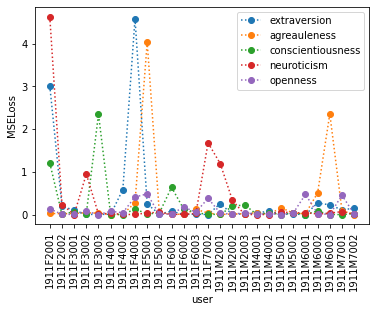

extraversion : 9.998499999999998
agreauleness   : 7.912300000000002
conscientiousness : 5.2585
neuroticism  : 9.4565
openness : 2.9617999999999998


In [41]:
import matplotlib.pyplot as plt

pred_extraversion = [3.0123, 0.202, 0.0963, 0.0011, 0.005, 0.0039, 0.5851, 4.5864, 0.246, 0.0114, 0.0762, 0.0014, 0.0076, 0.0002, 0.2573, 0.0043, 0.0163, 0.0306, 0.0854, 0.0041, 0.0101, 0.0, 0.272, 0.2262, 0.1091, 0.1482]
pred_agreauleness = [0.0267, 0.0184, 0.0259, 0.0424, 0.0311, 0.0002, 0.0046, 0.2791, 4.0358, 0.0274, 0.014, 0.0028, 0.1235, 0.0332, 0.0031, 0.01, 0.0209, 0.0451, 0.0031, 0.1599, 0.0326, 0.02, 0.5059, 2.3555, 0.0909, 0.0002]
pred_conscientiousness = [1.2061, 0.0032, 0.066, 0.0237, 2.3536, 0.0, 0.0005, 0.1292, 0.0142, 0.0379, 0.6372, 0.1299, 0.0435, 0.0028, 0.0064, 0.1892, 0.2288, 0.003, 0.0411, 0.0002, 0.04, 0.0004, 0.0813, 0.0007, 0.0, 0.0196]
pred_neuroticism = [4.6297, 0.2344, 0.0001, 0.9469, 0.0109, 0.0294, 0.0014, 0.0021, 0.038, 0.0528, 0.0041, 0.003, 0.0278, 1.6787, 1.1927, 0.3363, 0.0012, 0.0002, 0.0008, 0.0651, 0.036, 0.0462, 0.0108, 0.0308, 0.0699, 0.0072]
pred_openness = [0.1335, 0.0053, 0.0035, 0.0758, 0.0, 0.0754, 0.0431, 0.4124, 0.4828, 0.0014, 0.0139, 0.1751, 0.0555, 0.3798, 0.0353, 0.0051, 0.0415, 0.0047, 0.0224, 0.0008, 0.0362, 0.4722, 0.0226, 0.0, 0.4522, 0.0113]

plt.plot(Vid, pred_extraversion, 'o', linestyle='dotted', label='extraversion')
plt.plot(Vid, pred_agreauleness, 'o', linestyle='dotted', label='agreauleness')
plt.plot(Vid, pred_conscientiousness, 'o', linestyle='dotted', label='conscientiousness')
plt.plot(Vid, pred_neuroticism, 'o', linestyle='dotted', label='neuroticism')
plt.plot(Vid, pred_openness, 'o', linestyle='dotted', label='openness')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'extraversion : {np.array(pred_extraversion).sum()}')
print(f'agreauleness   : {np.array(pred_agreauleness).sum()}')
print(f'conscientiousness : {np.array(pred_conscientiousness).sum()}')
print(f'neuroticism  : {np.array(pred_neuroticism).sum()}')
print(f'openness : {np.array(pred_openness).sum()}')

# 特性を個別に予測した結果と同時に予測した結果の比較

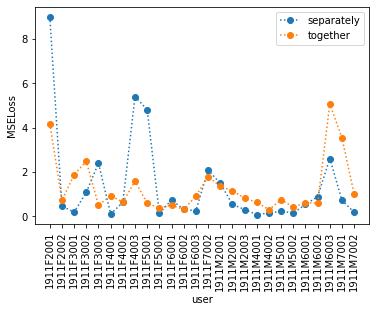

separately : 35.5876
together   : 33.7612


In [40]:
pred_separately = []
for i in range(len(Vid)):
    pred_separately.append(pred_extraversion[i] + pred_agreauleness[i] + pred_conscientiousness[i] + \
                           pred_neuroticism[i] + pred_openness[i])

pred_together = [4.1911, 0.7212, 1.8888, 2.487, 0.5033, 0.9333, 0.6441, 1.5912, 0.5993, 0.374, 0.5071, 0.3131, 0.913, 1.792, 1.3657, 1.1517, 0.8243, 0.6397, 0.3012, 0.7551, 0.4262, 0.6153, 0.5966, 5.0875, 3.5341, 1.0053]

plt.plot(Vid, pred_separately, 'o', linestyle='dotted', label='separately')
plt.plot(Vid, pred_together, 'o', linestyle='dotted', label='together')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'separately : {np.array(pred_separately).sum()}')
print(f'together   : {np.array(pred_together).sum()}')

# 各モーダルと予測結果の比較
ラベルはBig Fiveを同時に予測

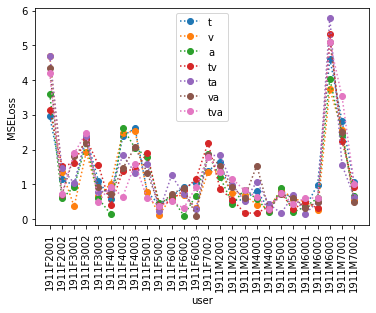

text : 34.3401
visual  : 31.534
audio : 30.649299999999997
text+visual  : 32.7544
text+audio : 34.5848
visual+audio  : 34.6131
all : 33.7612


In [37]:
pred_t = [2.9582, 1.1416, 0.9667, 2.3355, 1.094, 0.5861, 2.3942, 2.6084, 0.7773, 0.4119, 0.6424, 0.9191, 1.0483, 1.3837, 1.6524, 0.532, 0.5578, 0.8147, 0.2861, 0.8128, 0.5819, 0.3354, 0.9894, 4.6176, 2.8303, 1.0623]
pred_v = [4.6852, 1.362, 0.364, 1.9336, 0.6702, 1.0122, 2.4643, 2.5422, 0.7756, 0.1256, 0.641, 0.691, 0.3192, 1.3627, 1.3508, 0.7595, 0.6973, 0.412, 0.3142, 0.8523, 0.5828, 0.4987, 0.2716, 3.7352, 2.5583, 0.5525]
pred_a = [3.596, 0.5937, 0.9218, 2.198, 0.5917, 0.1391, 2.6212, 2.0446, 1.7949, 0.4576, 0.6258, 0.1006, 0.6671, 1.8597, 1.1993, 0.4302, 0.8438, 0.5739, 0.207, 0.8863, 0.1955, 0.3596, 0.5968, 4.0421, 2.4322, 0.6708]
pred_tv = [3.1356, 1.5232, 1.6106, 2.3108, 1.5463, 0.3979, 1.3764, 1.4317, 1.8892, 0.3808, 0.5415, 0.8293, 1.1429, 2.1923, 0.8553, 0.5616, 0.1738, 0.1694, 0.3559, 0.7434, 0.2845, 0.5023, 0.3079, 5.3219, 2.2377, 0.9322]
pred_ta = [4.6922, 1.4546, 1.0315, 2.3955, 0.7666, 0.8382, 1.8405, 1.3282, 1.5857, 0.2364, 1.2529, 0.726, 0.2866, 1.8297, 1.8293, 0.9776, 0.5209, 1.0674, 0.4394, 0.1623, 0.6873, 0.1575, 0.4925, 5.7906, 1.5623, 0.6331]
pred_va = [4.3439, 0.701, 1.8244, 2.2025, 0.9263, 0.7152, 1.4587, 2.0719, 1.3323, 0.3758, 0.725, 0.8852, 0.1, 1.856, 1.5329, 0.9092, 0.613, 1.5404, 0.2548, 0.7214, 0.6136, 0.3247, 0.479, 5.1042, 2.5148, 0.4869]
pred_tva = [4.1911, 0.7212, 1.8888, 2.487, 0.5033, 0.9333, 0.6441, 1.5912, 0.5993, 0.374, 0.5071, 0.3131, 0.913, 1.792, 1.3657, 1.1517, 0.8243, 0.6397, 0.3012, 0.7551, 0.4262, 0.6153, 0.5966, 5.0875, 3.5341, 1.0053]

plt.plot(Vid, pred_t, 'o', linestyle='dotted', label='t')
plt.plot(Vid, pred_v, 'o', linestyle='dotted', label='v')
plt.plot(Vid, pred_a, 'o', linestyle='dotted', label='a')
plt.plot(Vid, pred_tv, 'o', linestyle='dotted', label='tv')
plt.plot(Vid, pred_ta, 'o', linestyle='dotted', label='ta')
plt.plot(Vid, pred_va, 'o', linestyle='dotted', label='va')
plt.plot(Vid, pred_tva, 'o', linestyle='dotted', label='tva')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'text : {np.array(pred_t).sum()}')
print(f'visual  : {np.array(pred_v).sum()}')
print(f'audio : {np.array(pred_a).sum()}')
print(f'text+visual  : {np.array(pred_tv).sum()}')
print(f'text+audio : {np.array(pred_ta).sum()}')
print(f'visual+audio  : {np.array(pred_va).sum()}')
print(f'all : {np.array(pred_tva).sum()}')